Import needed libraries and load the CSV dataset.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('PLA_pokedex_complete.csv')
data.fillna('', inplace=True)

data

,TIER,ID,Pokemon,Type_1,Type_2,Total,HP,Attack,Special_Attack,Defense,Special_Defense,Speed
0,F,#001,Rowlet,Grass,Flying,320,68,55,50,55,50,42
1,D,#002,Dartrix,Grass,Flying,420,78,75,70,75,70,52
2,A,#003,Hisuian Decidueye,Grass,Fighting,530,88,112,95,80,95,60
3,F,#004,Cyndaquil,Fire,,309,39,52,60,43,50,65
4,D,#005,Quilava,Fire,,405,58,64,80,58,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...
243,C,#239,Phione,Water,,480,80,80,80,80,80,80
244,S,#240,Manaphy,Water,,600,100,100,100,100,100,100
245,S,#241,Shaymin Sky,Grass,Flying,600,100,103,120,75,75,127
246,S,#241,Shaymin Land,Grass,,600,100,100,100,100,100,100


Joining Type_1 and Type_2 into a new Type Column

In [16]:
data['Type'] = data['Type_1'].str.cat(data['Type_2'], sep=' / ')

data['Type']

0        Grass / Flying
1        Grass / Flying
2      Grass / Fighting
3               Fire / 
4               Fire / 
             ...       
243            Water / 
244            Water / 
245      Grass / Flying
246            Grass / 
247             Dark / 
Name: Type, Length: 248, dtype: object

In [17]:
corr = data.corr()

corr

,Total,HP,Attack,Special_Attack,Defense,Special_Defense,Speed
Total,1.000000,0.606434,0.701439,0.706829,0.571806,0.688161,0.551669
HP,0.606434,1.000000,0.387849,0.259715,0.175036,0.391560,0.113417
Attack,0.701439,0.387849,1.000000,0.297470,0.436634,0.191874,0.328590
Special_Attack,0.706829,0.259715,0.297470,1.000000,0.165540,0.469832,0.497484
Defense,0.571806,0.175036,0.436634,0.165540,1.000000,0.429404,-0.028790
Special_Defense,0.688161,0.391560,0.191874,0.469832,0.429404,1.000000,0.209301
Speed,0.551669,0.113417,0.328590,0.497484,-0.028790,0.209301,1.000000


# Heatmap of stats

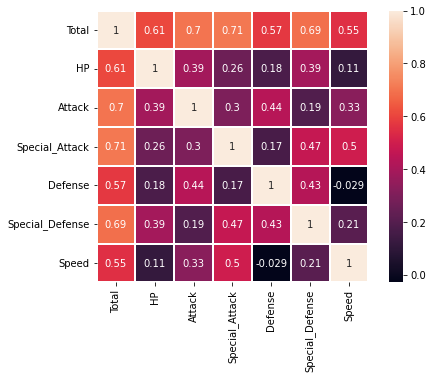

In [18]:
plt.figure(figsize=(7.5,5))
sb.heatmap(corr,annot=True,linewidths=0.1,vmax=1,square=True,cbar=True);

# Scatter Plot of the least correlated stats

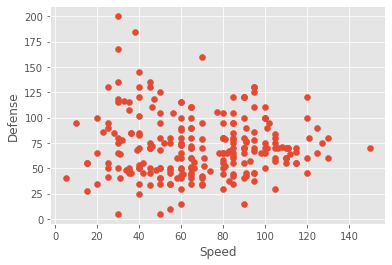

In [19]:
%matplotlib inline
plt.style.use('ggplot')

plt.scatter(data.Speed, data.Defense)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.show()

Text(0.5, 0, 'Type Frequency')

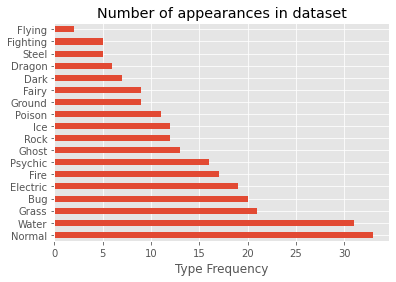

In [20]:
data.Type_1.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Type Frequency')

Text(0.5, 0, 'Type Frequency')

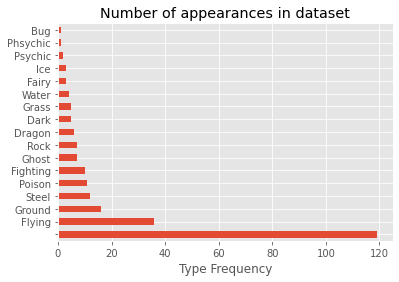

In [21]:
data.Type_2.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Type Frequency')

(-1.1000000039483246,
 1.1000000001880155,
 -1.1016167722375123,
 1.1057002925847659)

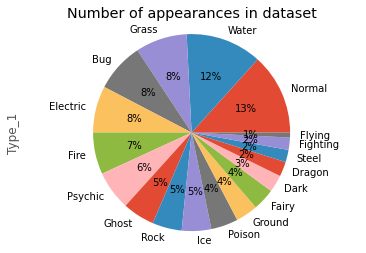

In [22]:
data['Type_1'].value_counts().plot(kind='pie', autopct = '%1.0f%%')

plt.title('Number of appearances in dataset')
plt.axis('equal')

(-1.164016696436932,
 1.1554251636345088,
 -1.1565766485823796,
 1.169723900152118)

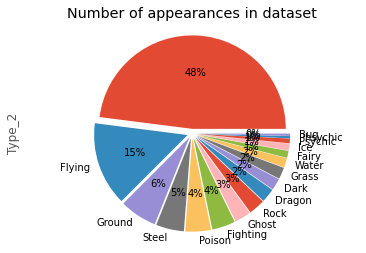

In [23]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
data.Type_2.value_counts().plot(kind = 'pie', autopct = '%1.0f%%', explode = explode )
plt.title('Number of appearances in dataset')
plt.axis('equal')

In [24]:
type1 = data.Type_1.value_counts().dropna()

data['Type_2'] = data['Type_2'].fillna(0)

data

#type2 = data.Type_2.value_counts()

#type_total = type1 + type2

#type_total

,TIER,ID,Pokemon,Type_1,Type_2,Total,HP,Attack,Special_Attack,Defense,Special_Defense,Speed,Type
0,F,#001,Rowlet,Grass,Flying,320,68,55,50,55,50,42,Grass / Flying
1,D,#002,Dartrix,Grass,Flying,420,78,75,70,75,70,52,Grass / Flying
2,A,#003,Hisuian Decidueye,Grass,Fighting,530,88,112,95,80,95,60,Grass / Fighting
3,F,#004,Cyndaquil,Fire,,309,39,52,60,43,50,65,Fire /
4,D,#005,Quilava,Fire,,405,58,64,80,58,65,80,Fire /
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,C,#239,Phione,Water,,480,80,80,80,80,80,80,Water /
244,S,#240,Manaphy,Water,,600,100,100,100,100,100,100,Water /
245,S,#241,Shaymin Sky,Grass,Flying,600,100,103,120,75,75,127,Grass / Flying
246,S,#241,Shaymin Land,Grass,,600,100,100,100,100,100,100,Grass /


In [ ]:
data['Type'].value_counts().plot(kind='pie', autopct = '%1.0f%%')

plt.title('Number of appearances in dataset')
plt.axis('equal')